In [0]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dataset = pd.read_excel ("/content/drive/My Drive/Sample - Superstore.xls")


In [4]:
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [0]:
dataset = dataset[["Order Date","Category","Sales"]]

In [6]:
dataset.head()

,Order Date,Category,Sales
0,2016-11-08,Furniture,261.9600
1,2016-11-08,Furniture,731.9400
2,2016-06-12,Office Supplies,14.6200
3,2015-10-11,Furniture,957.5775
4,2015-10-11,Office Supplies,22.3680


In [7]:
dataset = dataset[dataset['Category'] == 'Furniture'] #accessing by index, the values that are true
dataset.head()
# use.loc or.iloc when you have to change the value of the column

,Order Date,Category,Sales
0,2016-11-08,Furniture,261.9600
1,2016-11-08,Furniture,731.9400
3,2015-10-11,Furniture,957.5775
5,2014-06-09,Furniture,48.8600
10,2014-06-09,Furniture,1706.1840


In [0]:
#idx = dataset["Category"] == "Furniture"
#dataset = dataset[idx]
#dataset.head()

In [0]:
cols = ['Category']
dataset.drop(cols, axis=1, inplace=True)
dataset = dataset.sort_values('Order Date')

In [10]:

dataset.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [11]:
dataset.shape

(2121, 2)

In [12]:
#dataset["Month"] = pd.to_datetime(dataset["Month"], infer_datetime_format=True)
#df.Date = pd.to_datetime(df.Date)
dataset["Order Date"] = pd.to_datetime(dataset["Order Date"], infer_datetime_format=True)
#df.set_index('Date', inplace=True)
#dataset.set_index('Order Date', inplace=True)
dataset.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [13]:
dataset['Order Date'] = dataset['Order Date'].apply(lambda x:x.date().strftime('%y-%m'))
dataset['Order Date']= pd.to_datetime(dataset['Order Date'],format='%y-%m')
dataset

,Order Date,Sales
7474,2014-01-01,2573.8200
7660,2014-01-01,76.7280
866,2014-01-01,51.9400
716,2014-01-01,9.9400
2978,2014-01-01,545.9400
4938,2014-01-01,333.9990
6474,2014-01-01,61.9600
970,2014-01-01,127.1040
5465,2014-01-01,181.4700
6327,2014-01-01,272.9400


In [14]:
dataset = dataset.groupby('Order Date')['Sales'].sum().reset_index()
dataset.head()

,Order Date,Sales
0,2014-01-01,6242.525
1,2014-02-01,1839.658
2,2014-03-01,14573.956
3,2014-04-01,7944.837
4,2014-05-01,6912.787


In [15]:
dataset.shape

(48, 2)

In [16]:
dataset['Order Date'].min()

Timestamp('2014-01-01 00:00:00')

In [17]:
dataset['Order Date'].max()

Timestamp('2017-12-01 00:00:00')

In [18]:
dataset

,Order Date,Sales
0,2014-01-01,6242.5250
1,2014-02-01,1839.6580
2,2014-03-01,14573.9560
3,2014-04-01,7944.8370
4,2014-05-01,6912.7870
5,2014-06-01,13206.1256
6,2014-07-01,10821.0510
7,2014-08-01,7320.3465
8,2014-09-01,23816.4808
9,2014-10-01,12304.2470


In [19]:
dataset["Order Date"].dtype

dtype('<M8[ns]')

In [20]:
#df.resample('MS').sum() or could do the mean for each month  dataset['Sales'].resample('MS').mean()
#dataset.resample("MS").sum()
#dataset.resample("M").sum()
#f1.groupby([pd.TimeGrouper(freq='M'), 'user_id'])['whole_cost'].sum()
#dataset = dataset.groupby([pd.TimeGrouper(freq='M'), 'Order Date'])['Sales'].sum() #Monthly gross data
#resamp = dataset.set_index('Order Date').groupby('Sales').resample('M', how='sum')
#resamp
dataset


,Order Date,Sales
0,2014-01-01,6242.5250
1,2014-02-01,1839.6580
2,2014-03-01,14573.9560
3,2014-04-01,7944.8370
4,2014-05-01,6912.7870
5,2014-06-01,13206.1256
6,2014-07-01,10821.0510
7,2014-08-01,7320.3465
8,2014-09-01,23816.4808
9,2014-10-01,12304.2470


In [21]:
dataset.dropna()

,Order Date,Sales
0,2014-01-01,6242.5250
1,2014-02-01,1839.6580
2,2014-03-01,14573.9560
3,2014-04-01,7944.8370
4,2014-05-01,6912.7870
5,2014-06-01,13206.1256
6,2014-07-01,10821.0510
7,2014-08-01,7320.3465
8,2014-09-01,23816.4808
9,2014-10-01,12304.2470


In [22]:
dataset.shape

(48, 2)

In [23]:
dataset = dataset.set_index('Order Date') # had to reset index for plotting
dataset.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq=None)

In [24]:
dataset


,Sales
Order Date,
2014-01-01,6242.5250
2014-02-01,1839.6580
2014-03-01,14573.9560
2014-04-01,7944.8370
2014-05-01,6912.7870
2014-06-01,13206.1256
2014-07-01,10821.0510
2014-08-01,7320.3465
2014-09-01,23816.4808


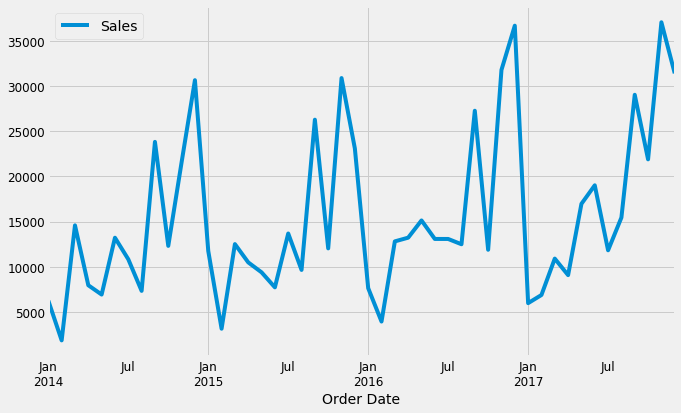

In [25]:
# TODO convert to monthly, compare with Prophet library
dataset.plot()
plt.show()

In [26]:
dataset.isnull().sum()

Sales    0
dtype: int64

In [0]:
#indexeddataset.columns = ['Order Date', 'Furniture']
indexeddataset = dataset

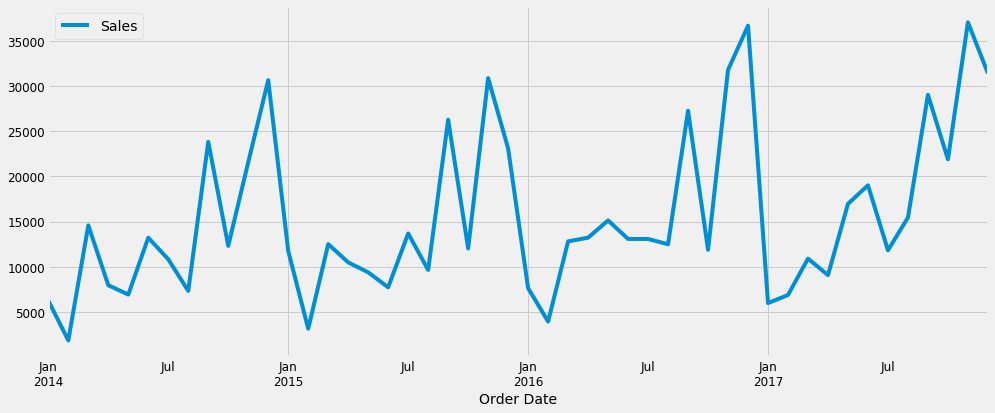

In [28]:
indexeddataset.plot(figsize=(15, 6))
plt.show()

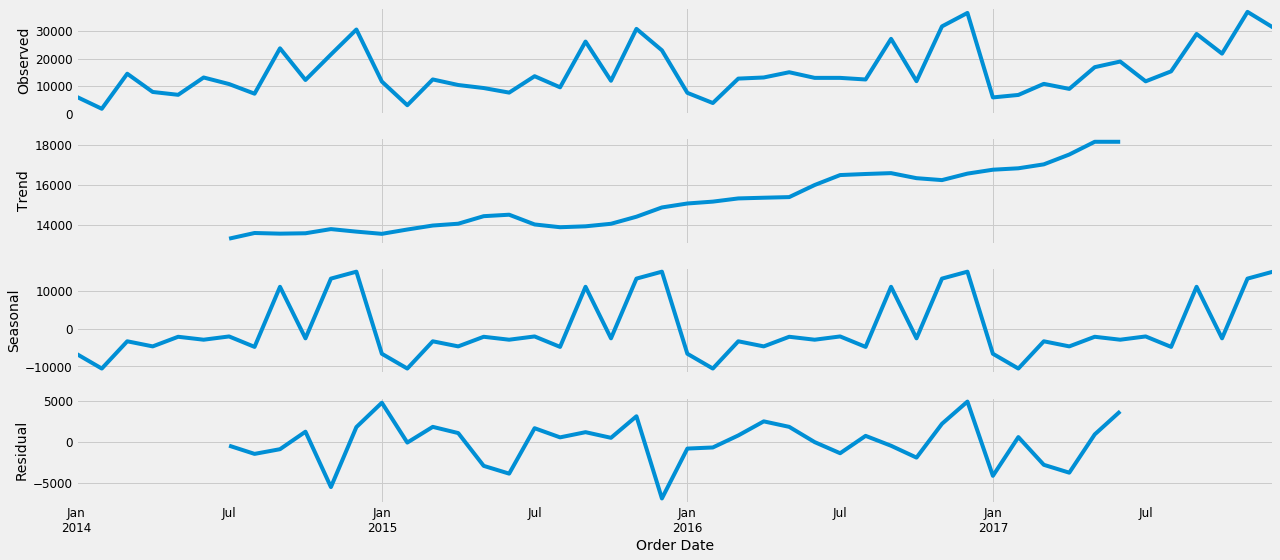

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(indexeddataset, model='additive')
fig = decomposition.plot()
plt.show()

In [30]:
indexeddataset


,Sales
Order Date,
2014-01-01,6242.5250
2014-02-01,1839.6580
2014-03-01,14573.9560
2014-04-01,7944.8370
2014-05-01,6912.7870
2014-06-01,13206.1256
2014-07-01,10821.0510
2014-08-01,7320.3465
2014-09-01,23816.4808


In [0]:
#indexeddataset = dataset.set_index(["Month"])

In [32]:
indexeddataset


,Sales
Order Date,
2014-01-01,6242.5250
2014-02-01,1839.6580
2014-03-01,14573.9560
2014-04-01,7944.8370
2014-05-01,6912.7870
2014-06-01,13206.1256
2014-07-01,10821.0510
2014-08-01,7320.3465
2014-09-01,23816.4808


In [33]:
from datetime import datetime
indexeddataset.head()

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


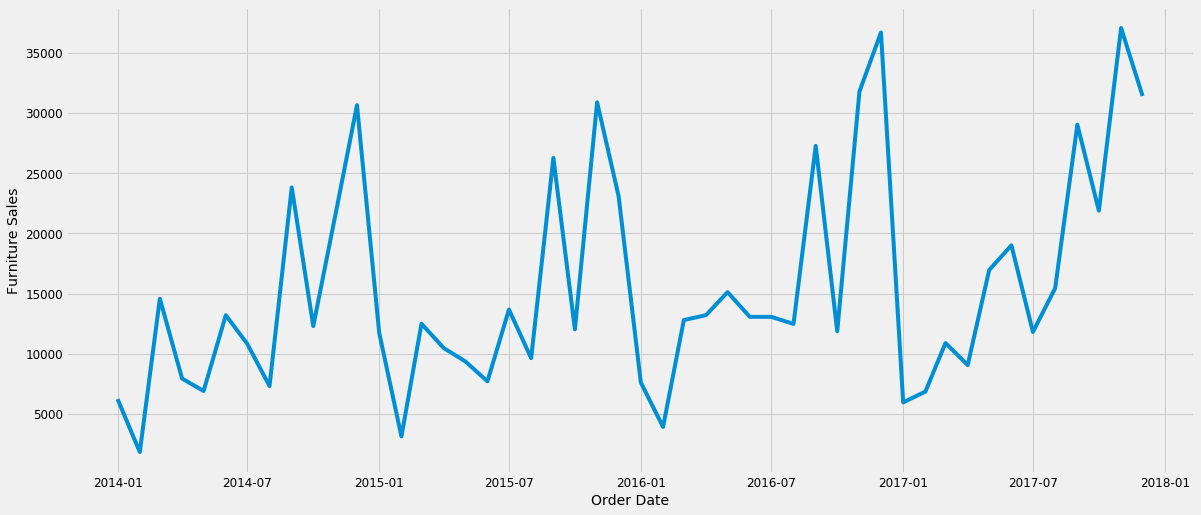

In [34]:
plt.xlabel("Order Date")
plt.ylabel("Furniture Sales")
plt.plot(indexeddataset)

This time-series does not have stationarity. The average mean is changing over time.

In [0]:
rolmean = indexeddataset.rolling(window=4).mean()
# had 12 years of data for airline dataset

In [36]:

rolmean

,Sales
Order Date,
2014-01-01,NaN
2014-02-01,NaN
2014-03-01,NaN
2014-04-01,7650.244000
2014-05-01,7817.809500
2014-06-01,10659.426400
2014-07-01,9721.200150
2014-08-01,9565.077525
2014-09-01,13791.000975


In [0]:
rolstd = indexeddataset.rolling(window=4).std()

In [38]:
rolstd

,Sales
Order Date,
2014-01-01,NaN
2014-02-01,NaN
2014-03-01,NaN
2014-04-01,5284.226697
2014-05-01,5235.106258
2014-06-01,3795.414831
2014-07-01,2851.726246
2014-08-01,2994.893591
2014-09-01,7107.327137


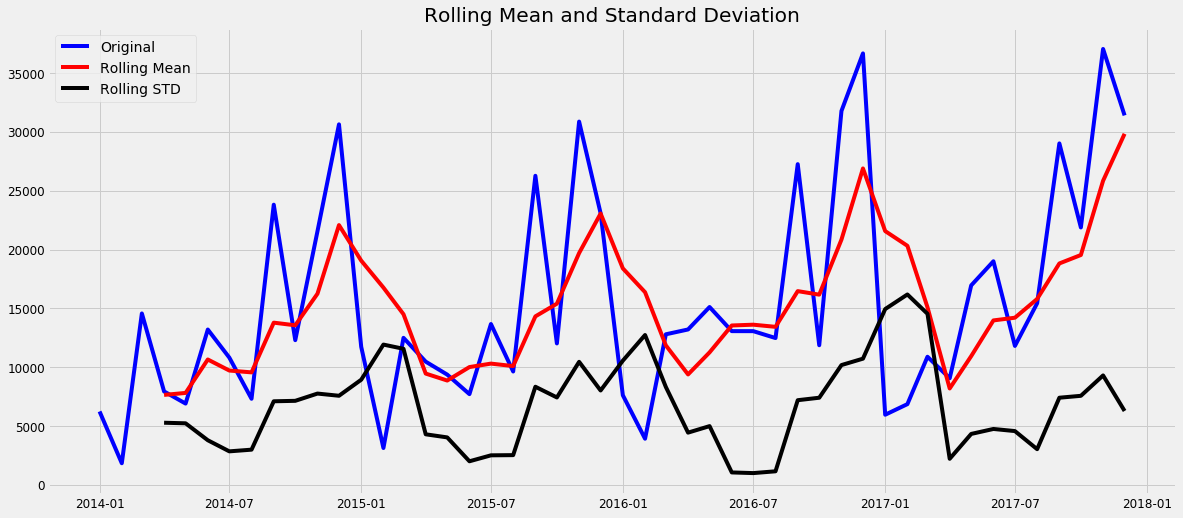

In [39]:
# Plot rolling statistics
orig = plt.plot(indexeddataset,color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = "Rolling STD")
plt.legend(loc='best') # will decide on best location for legend
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

mean and standard deviation is not constant so the data is not stationary

In [40]:
# perform Dickey fuller test
from statsmodels.tsa.stattools import adfuller
print("Results from Dickey Fuller Tests")

dftest = adfuller(indexeddataset['Sales'], autolag='AIC') # exact values and the estimated values metric
#dftest = adfuller(indexeddataset.iloc[:,1], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value %s'%key] = value
  
print(dfoutput)
# cannot reject the null hypothesis, data is not stationary p-value should be 0.05; CV should be more than test statistic
# Dickey Fuller test assumes that the time series is stationary
# p-value should be greater than 0.05 & that the CV's magnitude should be greater than the Test Statistic than that means
# the time-series is not stationary

# Furniture Dataset:
#p-value is very small
#the Test Statistic should be less than CValues the time series is stationary

Results from Dickey Fuller Tests
Test Statistic                 -4.699026
p-value                         0.000085
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value 1%              -3.577848
Critical Value 5%              -2.925338
Critical Value 10%             -2.600774
dtype: float64


In [41]:
dfoutput

Test Statistic                 -4.699026
p-value                         0.000085
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value 1%              -3.577848
Critical Value 5%              -2.925338
Critical Value 10%             -2.600774
dtype: float64

In [42]:
dftest

(-4.699026242828903,
 8.450793985809654e-05,
 0,
 47,
 {'1%': -3.5778480370438146,
  '10%': -2.6007735310095064,
  '5%': -2.925338105429433},
 781.9861669712573)

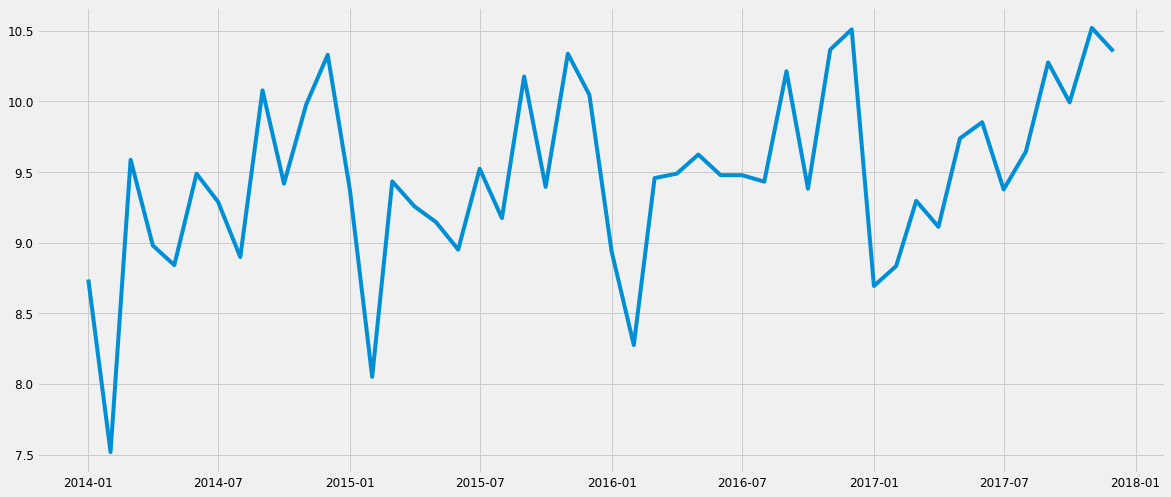

In [43]:
# Estimating trend
indexeddataset_logscale = np.log(indexeddataset)
plt.plot(indexeddataset_logscale)
#normalized by using log_scale

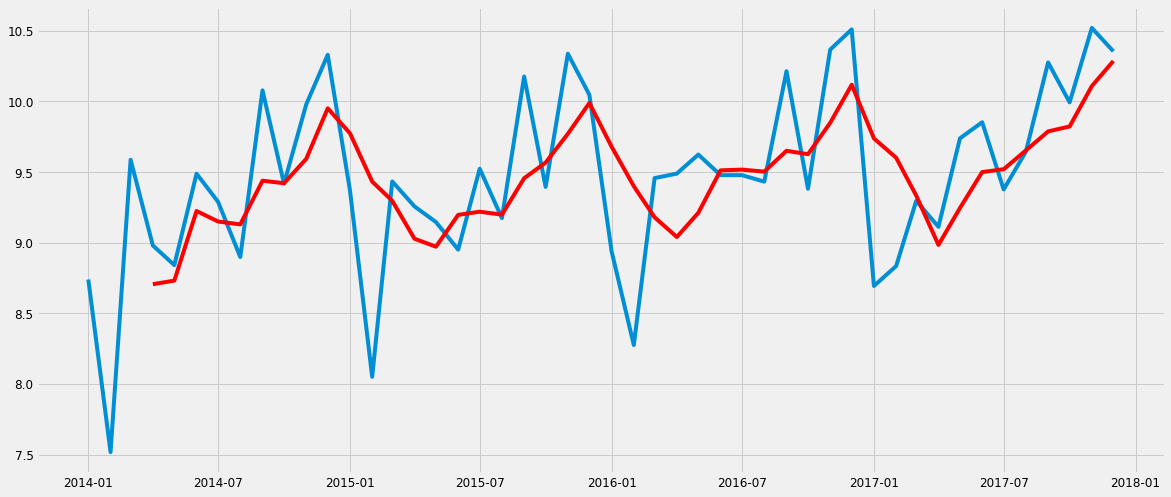

In [44]:

movingAverage = indexeddataset_logscale.rolling(window=4).mean()
movingstd = indexeddataset_logscale.rolling(window=4).std()
plt.plot(indexeddataset_logscale)
plt.plot(movingAverage,color='red')
# Confirms that the mean is not stationary, graph plotted with logscale, still has an upward trend


In [45]:
datasetLogScaleMinusMovingAverage = indexeddataset_logscale - movingAverage
datasetLogScaleMinusMovingAverage.head(10)

,Sales
Order Date,
2014-01-01,NaN
2014-02-01,NaN
2014-03-01,NaN
2014-04-01,0.274342
2014-05-01,0.109695
2014-06-01,0.264228
2014-07-01,0.139476
2014-08-01,-0.230894
2014-09-01,0.639575


In [0]:
#remove Nan values
datasetLogScaleMinusMovingAverage.dropna(inplace=True) # saves space by not sorting a new dataframe, changes current df


In [47]:
datasetLogScaleMinusMovingAverage.head(10)

,Sales
Order Date,
2014-04-01,0.274342
2014-05-01,0.109695
2014-06-01,0.264228
2014-07-01,0.139476
2014-08-01,-0.230894
2014-09-01,0.639575
2014-10-01,-0.003174
2014-11-01,0.385554
2014-12-01,0.379029


In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determining rolling statistics
    
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics
    orig = plt.plot(timeseries,color='blue',label = 'Original')
    mean = plt.plot(rolmean,color ='red',label = 'Rolling Mean')
    std = plt.plot(rolstd,color ='black',label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    #Perform Dickey Fuller Test
    print ("Results of Dickey Fuller Test: ")
    dftest = adfuller(timeseries['Sales'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print (dfoutput)


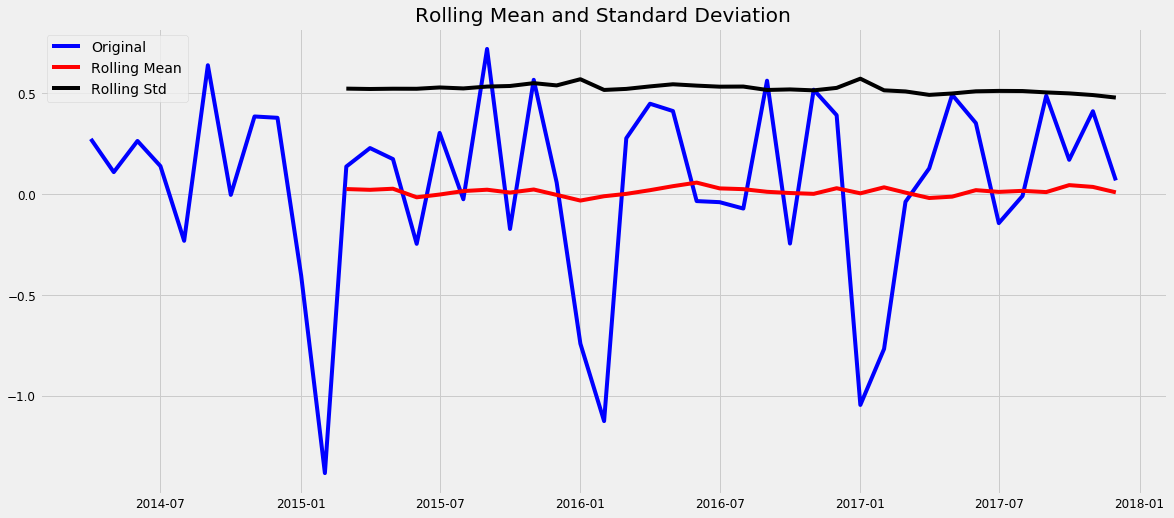

Results of Dickey Fuller Test: 
Test Statistic                -6.777470e+00
p-value                        2.549062e-09
#Lags Used                     1.000000e+01
Number of Observations Used    3.400000e+01
Critical Value (1%)           -3.639224e+00
Critical Value (5%)           -2.951230e+00
Critical Value (10%)          -2.614447e+00
dtype: float64


In [49]:
test_stationarity(datasetLogScaleMinusMovingAverage)

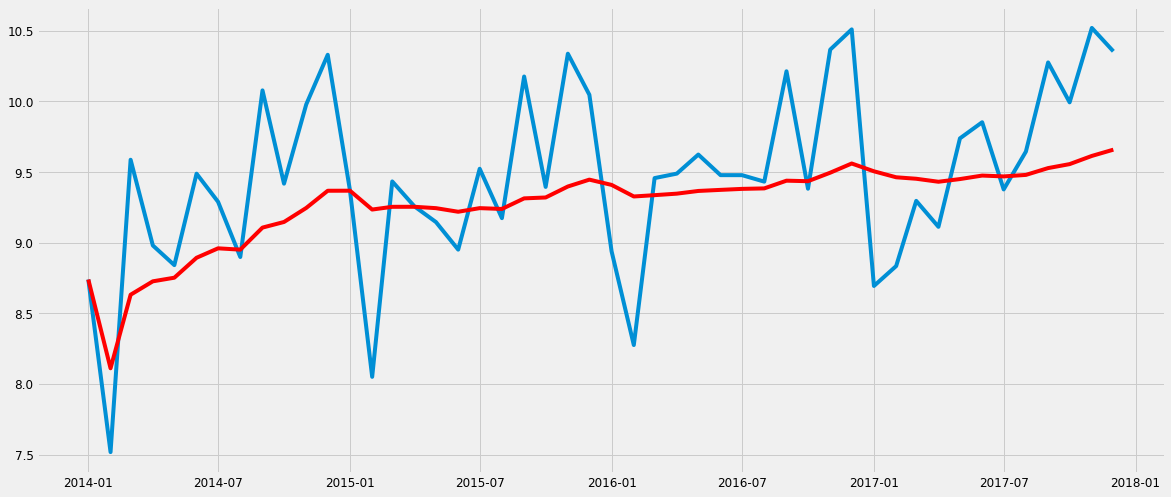

In [50]:
exponentialDecayWeightedAverage = indexeddataset_logscale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexeddataset_logscale)
plt.plot(exponentialDecayWeightedAverage, color = 'red') # trend is upwards

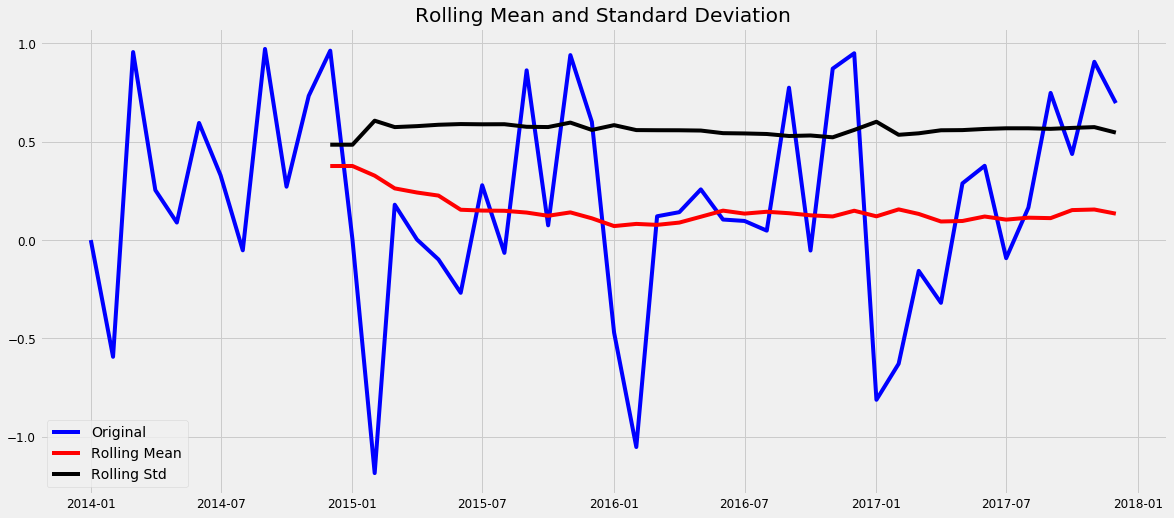

Results of Dickey Fuller Test: 
Test Statistic                 -4.227750
p-value                         0.000591
#Lags Used                      9.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


In [51]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexeddataset_logscale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

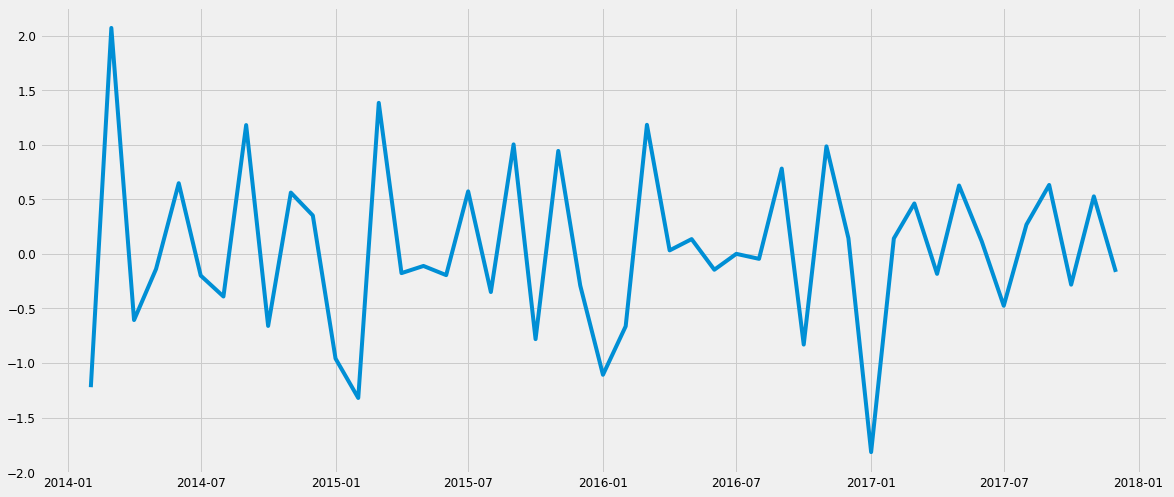

In [52]:
datasetLogDiffShifting = indexeddataset_logscale - indexeddataset_logscale.shift() 
plt.plot(datasetLogDiffShifting) # differentiating portion of ARIMA 'I' 1 is usually enough

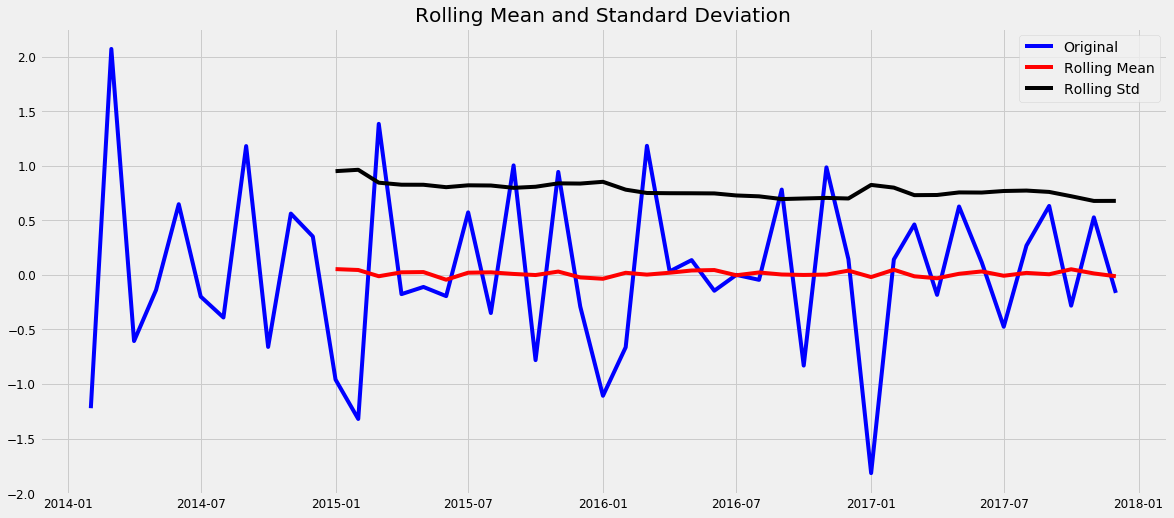

Results of Dickey Fuller Test: 
Test Statistic                -9.673713e+00
p-value                        1.256989e-16
#Lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64


In [53]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

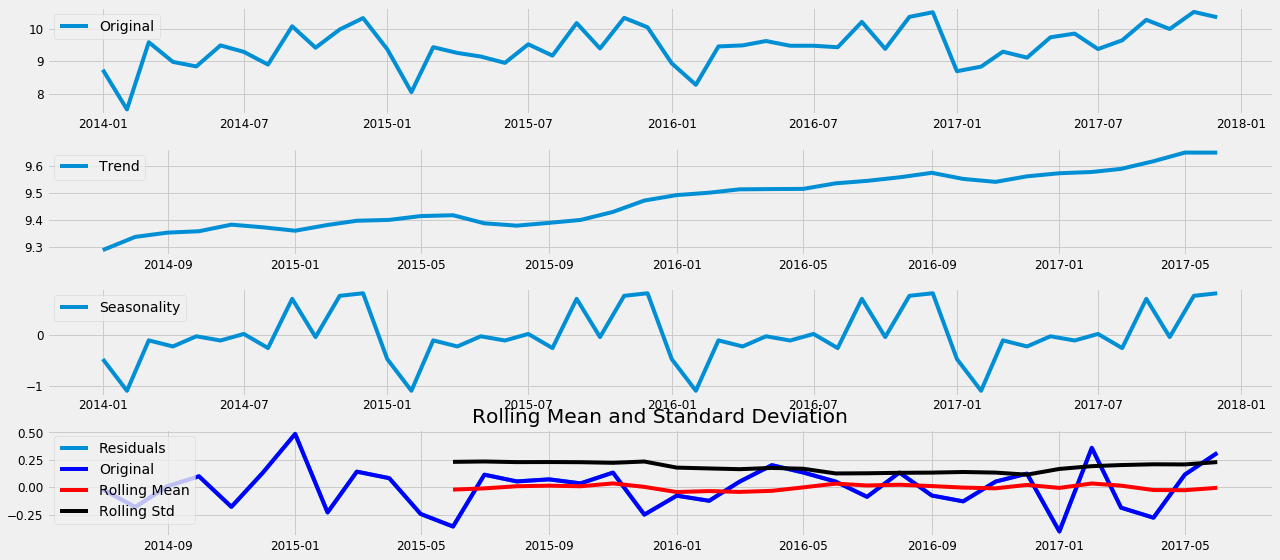

Results of Dickey Fuller Test: 
Test Statistic                 -5.499676
p-value                         0.000002
#Lags Used                      4.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexeddataset_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexeddataset_logscale, label = "Original")
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = "Trend")
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = "Seasonality")
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = "Residuals")
plt.legend(loc = 'best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

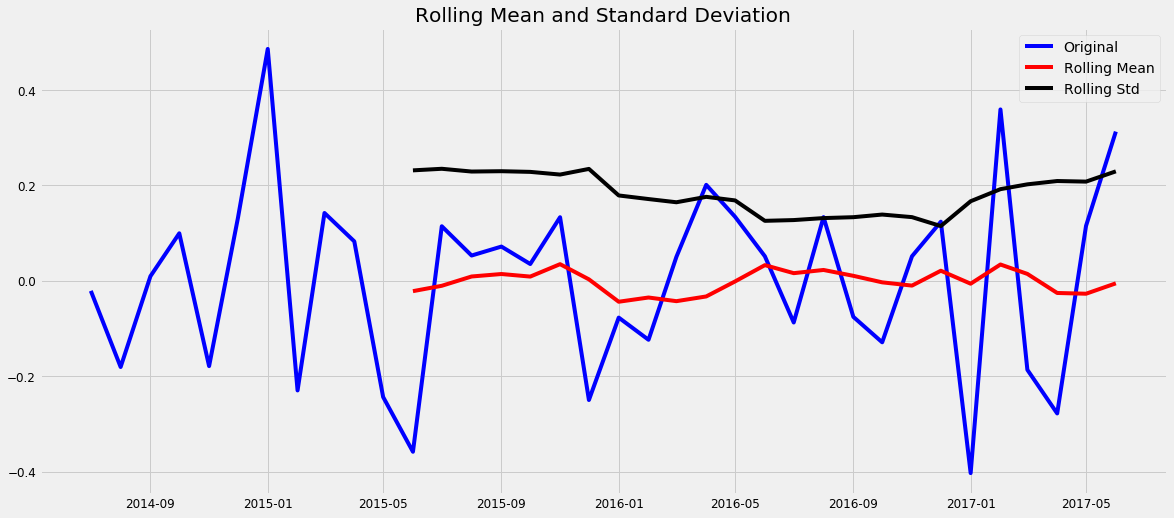

Results of Dickey Fuller Test: 
Test Statistic                 -5.499676
p-value                         0.000002
#Lags Used                      4.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [55]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

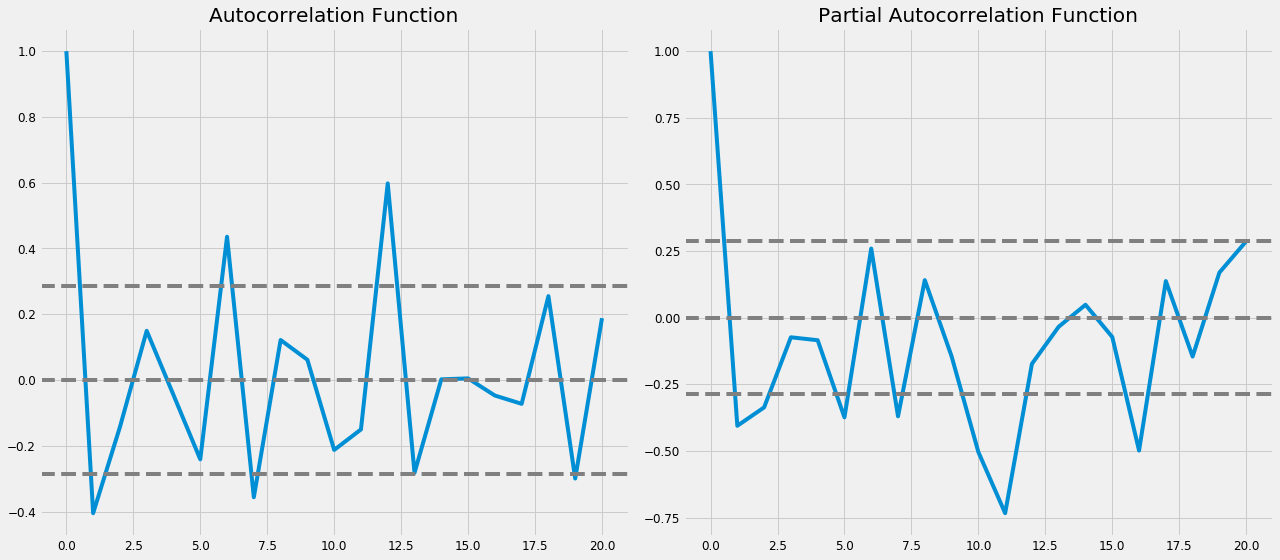

In [56]:
#ACF & PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method = 'ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.title("Autocorrelation Function")

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()





In [0]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA Model


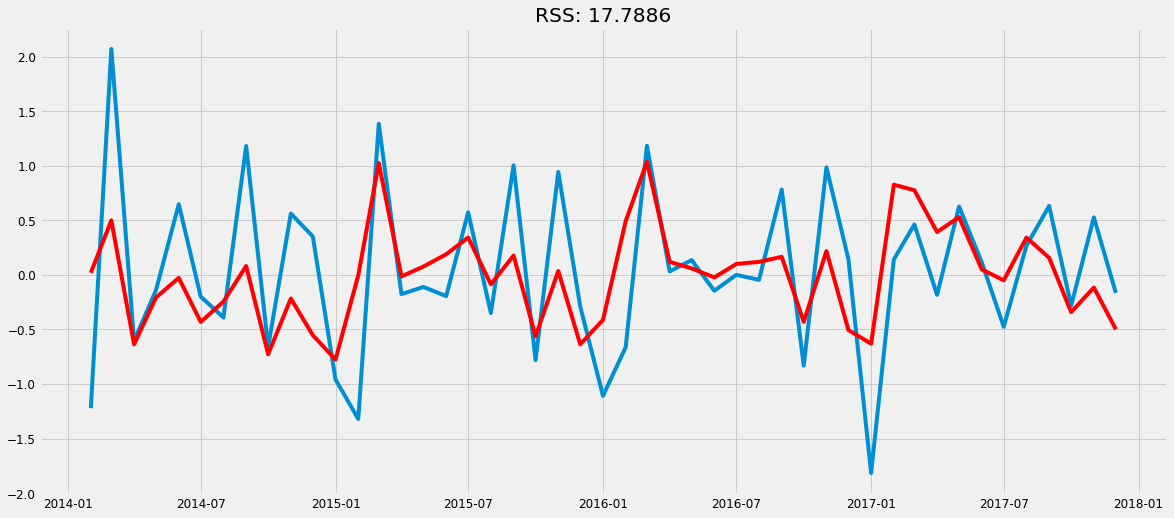

In [58]:
model = ARIMA(indexeddataset_logscale,order=(0,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Sales'])**2))
print("Plotting ARIMA Model")
#17.8043 (1,1,1)
#17.8406 (2,1,1)
# 17.7886 (0,1,2)***
# 18.3606 (0,1,1)


In [59]:
indexeddataset_logscale

,Sales
Order Date,
2014-01-01,8.739140
2014-02-01,7.517335
2014-03-01,9.586991
2014-04-01,8.980278
2014-05-01,8.841128
2014-06-01,9.488436
2014-07-01,9.289249
2014-08-01,8.898413
2014-09-01,10.078133


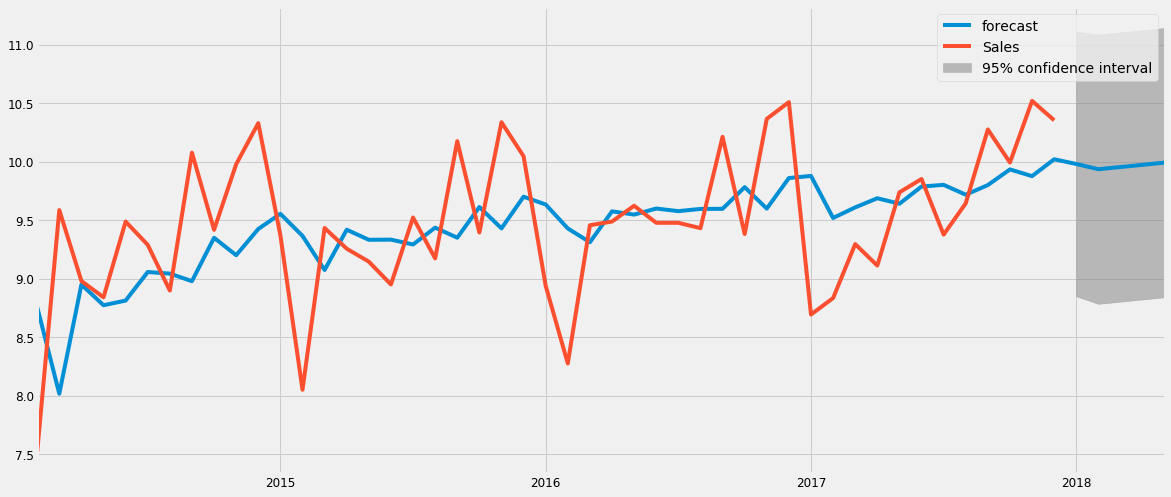

In [60]:
y = results_ARIMA.plot_predict(1,52)
#x=results_ARIMA.forecast(steps=120)


In [61]:
np.exp(results_ARIMA.forecast(steps=120)[0]) #real predicted values

array([ 21612.80638813,  20665.47194181,  21058.25739241,  21458.50845573,
        21866.36702953,  22281.97770859,  22705.48783598,  23137.0475553 ,
        23576.80986391,  24024.93066716,  24481.56883369,  24946.88625169,
        25421.04788638,  25904.22183842,  26396.57940354,  26898.29513326,
        27409.54689679,  27930.51594405,  28461.38696996,  29002.34817991,
        29553.59135648,  30115.31192742,  30687.70903496,  31270.98560639,
        31865.34842602,  32471.00820845,  33088.17967333,  33717.08162143,
        34357.93701225,  35010.97304304,  35676.42122934,  36354.51748709,
        37045.50221625,  37749.62038601,  38467.12162166,  39198.26029307,
        39943.29560489,  40702.49168843,  41476.1176953 ,  42264.44789285,
        43067.76176136,  43886.34409316,  44720.48509359,  45570.48048388,
        46436.63160598,  47319.2455294 ,  48218.63516008,  49135.1193513 ,
        50069.02301676,  51020.67724572,  51990.41942042,  52978.59333567,
        53985.54932072,  

In [0]:
from fbprophet import Prophet

In [63]:
indexeddataset #order date is the index

,Sales
Order Date,
2014-01-01,6242.5250
2014-02-01,1839.6580
2014-03-01,14573.9560
2014-04-01,7944.8370
2014-05-01,6912.7870
2014-06-01,13206.1256
2014-07-01,10821.0510
2014-08-01,7320.3465
2014-09-01,23816.4808


In [64]:
lm = indexeddataset.reset_index()
lm

,Order Date,Sales
0,2014-01-01,6242.5250
1,2014-02-01,1839.6580
2,2014-03-01,14573.9560
3,2014-04-01,7944.8370
4,2014-05-01,6912.7870
5,2014-06-01,13206.1256
6,2014-07-01,10821.0510
7,2014-08-01,7320.3465
8,2014-09-01,23816.4808
9,2014-10-01,12304.2470


In [65]:
indexeddataset = lm
indexeddataset


,Order Date,Sales
0,2014-01-01,6242.5250
1,2014-02-01,1839.6580
2,2014-03-01,14573.9560
3,2014-04-01,7944.8370
4,2014-05-01,6912.7870
5,2014-06-01,13206.1256
6,2014-07-01,10821.0510
7,2014-08-01,7320.3465
8,2014-09-01,23816.4808
9,2014-10-01,12304.2470


In [66]:
indexeddataset = indexeddataset.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(indexeddataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:

furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

<Figure size 1296x432 with 0 Axes>

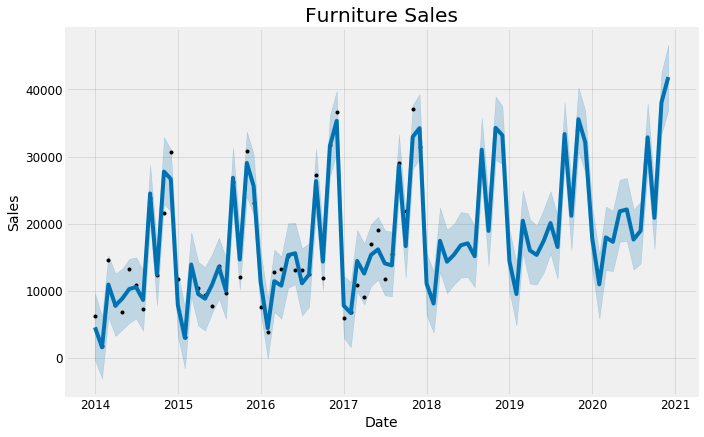

In [68]:
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

In [0]:
lm.to_csv("/content/drive/My Drive/furniture2.csv")